In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gibbs

In [2]:
data = np.loadtxt('./spikes.txt')

times = data[0, :]
firings = data[1, :]

times, indices = np.unique(times, return_index=True)
firings = firings[indices].astype(int)

In [3]:
new_times = np.linspace(0.001, 10, 10000)
new_firings = np.zeros_like(new_times).astype(int)

# Find the indices where the times are registered
indices = np.searchsorted(new_times, times)
new_firings[indices] = firings

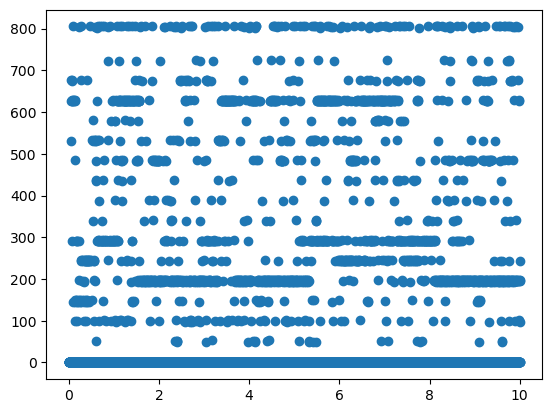

In [4]:
plt.scatter(new_times, new_firings)

In [5]:
K = 2
N = 805
T = len(new_times)
seed = 12345

v = np.ones(K)
u = np.ones((K, K))
w = np.ones((N + 1, K))
num_iterations = 100

pi_est, gamma_est, r_est, running_nmi, running_perc_corr_class,\
    pi_init, gamma_init, r_init = gibbs.gibbs_sampling(new_firings, v, u, w, num_iterations)

In [6]:
print("Pi_est:\n", pi_est)
print("Gamma_est:\n", gamma_est)
print("R_est:\n", r_est)

Pi_est:
 [0.49691661 0.50308339]
Gamma_est:
 [[0.89768613 0.10231387]
 [0.66595741 0.33404259]]
R_est:
 [[8.24011392e-01 5.23482112e-01]
 [1.12142147e-06 1.16950483e-05]
 [5.04087768e-07 6.98106634e-06]
 ...
 [2.40159722e-03 9.88912333e-04]
 [3.68956844e-07 8.46871802e-07]
 [7.58720431e-03 1.37669024e-02]]


In [ ]:
num_iterations = 50
    
for K in [2,3,4,5,6,7]:
    print(f'##################### K={K} ########################')

    v = np.ones(K)
    u = np.ones((K, K))
    w = np.ones((N + 1, K))
    z0 = np.ones(K)
    
    pi_est, gamma_est, r_est, running_nmi, running_perc_corr_class, pi_init, gamma_init, r_init = gibbs.gibbs_sampling(new_firings, z0, v, u, w, num_iterations)
    print("Pi_est:\n", pi_est)
    print("Gamma_est:\n", gamma_est)
    print("R_est:\n", r_est)

In [ ]:
# store the results of the runs
num_rep = 10
K = 4
type_run = f'Estimating the parameters from the real data (K={K}) (uniform initialization of z)'

gibbs.run_simulation_real(new_firings,T,N,K,seed,num_rep,type_run)